The training set contains several records about the passengers of Titanic (hence the name of the dataset). It has 12 features capturing information about passenger_class, port_of_Embarkation, passenger_fare etc. The dataset's label is survival which denotes the survivial status of a particular passenger. 
Your task is to cluster the records into two i.e. the ones who survived and the ones who did not.
You might be thinking that since it is a labeled dataset, how could it be used for a clustering task? You just have to drop the 'survival' column from the dataset and make it unlabeled. It's the task of K-Means to cluster the records of the datasets if they survived or not.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df1=pd.read_csv("D:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets\\test.csv")

In [3]:
df2=pd.read_csv("D:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets\\train.csv")

In [4]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df1.shape

(418, 11)

In [6]:
df2.shape

(891, 12)

In [7]:
df1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df2.fillna(df2.mean(),inplace=True)
print(df2.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
df1.fillna(df1.mean(),inplace=True)
print(df1.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


You can see there are still some missing values in the Cabin and Embarked columns. This is because these values are non-numeric. In order to perform the imputation the values need to be in numeric form. There are ways to convert a non-numeric value to a numeric one. 

Let's do some more analytics in order to understand the data better. Understanding is really required in order to perform any Machine Learning task. Let's start with finding out which features are categorical and which are numerical.
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass. Continuous: Age, Fare. Discrete: SibSp, Parch.
Two features are left out which are not listed above in any of the categories. Yes, you guessed it right, Ticket and Cabin. Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric. 

In [11]:
df2['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [12]:
df2['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Let's see the survival count of passengers with respect to the following features:
Pclass, Sex, SibSp, Parch

In [13]:
df2[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
df2[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


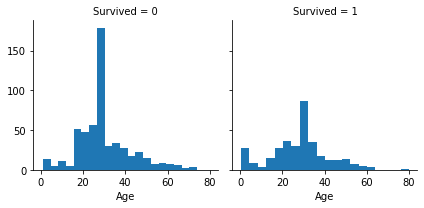

In [15]:
g=sns.FacetGrid(df2,col='Survived')
g.map(plt.hist,'Age',bins=20)

C:\Users\Pawas\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


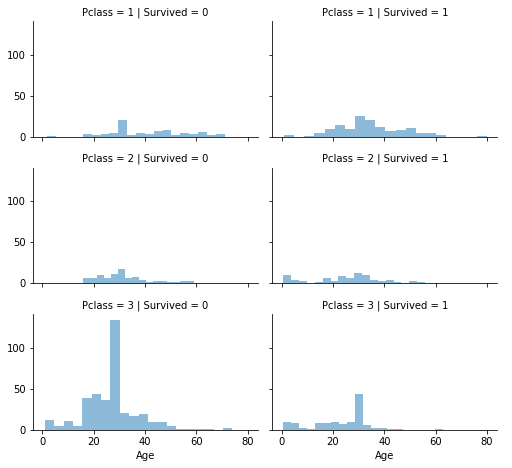

In [16]:
grid = sns.FacetGrid(df2, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Building K-Means model:

Let's do some Data Processing. You can see that not all the feature values are of same type. Some of them are numerical and some of them are not. In order to ease the computation, you will feed all numerical data to the model. Let's see the data types of different features that you have:

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
df2=df2.drop(['Name','Ticket','Cabin','Embarked'],axis=1)


In [19]:
df1=df1.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

In [21]:
labelencoder=LabelEncoder()
labelencoder.fit(df2['Sex'])
labelencoder.fit(df1['Sex'])
df2['Sex']=labelencoder.transform(df2['Sex'])
df1['Sex']=labelencoder.transform(df1['Sex'])

In [35]:
df2['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


In [24]:
x=np.array(df2.drop(['Survived'],1).astype(float))
y=np.array(df2['Survived'])

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB


In [27]:
km=KMeans(n_clusters=2)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
correct=0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(x))
    

0.5084175084175084


The model was able to cluster correctly with a 50% (accuracy of the model). But in order to enhance the performance of the model you could tweak some parameters of the model itself. Below are the list of some of these parameters which the scikit-learn implementation of K-Means provides:
algorithm, max_iter, n_jobs 

In [32]:
km=KMeans(n_clusters=2,max_iter=600,algorithm='auto')

In [33]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.49158249158249157


We can see a decrease in the score. One of the reasons being we have not scaled the values of the different features that you are feeding to the model. The features in the dataset contain different ranges of values. So, what happens is a small change in a feature does not affect the other feature. So, it is also important to scale the values of the features to a same range.
Let's do that now and for this experiment you are going to take 0 - 1 as the uniform value range across all the features.

In [37]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
km.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
x_scaled

array([[0.        , 1.        , 1.        , ..., 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.        , ..., 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 1.        , 0.        , ..., 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

In [38]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(x))

0.6262626262626263


We can see a 12% increase in the score.